# Plots

This is a Jupyter notebook used to generate the plots in the research.

In [1]:
import numpy             as np
import matplotlib        as mpl
import matplotlib.pyplot as plt
import pandas            as pd

from os import path, makedirs

# set parameters for matplotlib
%matplotlib inline
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# define absolute and relative paths
ROOT_DIR = '.' #-------------------------------------------------- root directory
IMG_DIR  = 'img' #------------------------------------------------ directory of images
IMG_PATH = path.join(ROOT_DIR, IMG_DIR, 'paper')

# create directories if non existent
if not path.isdir(IMG_PATH):
    makedirs(IMG_PATH, exist_ok=True)

## Distribution of $h_{11}$ and $h_{21}$

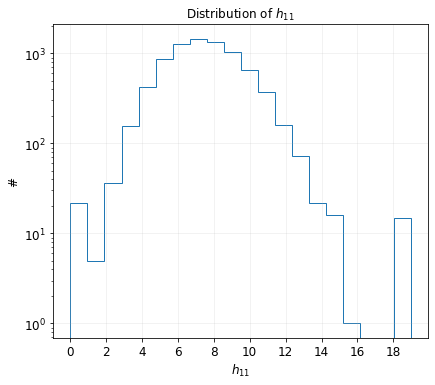

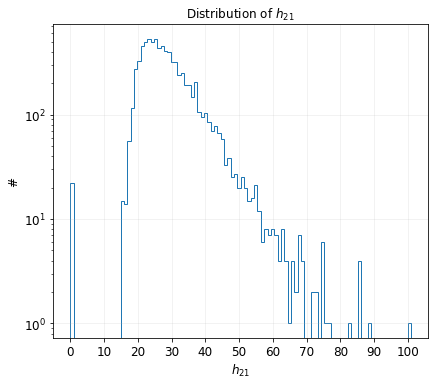

In [2]:
df  = pd.read_hdf(path.join(ROOT_DIR, 'cicy3o.h5'))
h11 = df['h11'] #----------------------------------------- extract h11 labels
h21 = df['h21'] #----------------------------------------- extract h21 labels

bins_h11 = np.max(h11) - np.min(h11) + 1
bins_h21 = np.max(h21) - np.min(h21) + 1

# create plot for h11
fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout()

ax.grid(alpha=0.2)

ax.set_title('Distribution of $h_{11}$')
ax.set_xlabel('$h_{11}$')
ax.set_ylabel('#')
ax.set_yscale('log')

ax.set_xticks(np.arange(np.min(h11), np.max(h11) + 1, step=int(bins_h11 / 10), dtype=np.int))

ax.hist(h11, bins=bins_h11, histtype='step')

fig.savefig(path.join(IMG_PATH, 'distribution_h11.pdf'), dpi=96, format='pdf')
plt.show()
plt.close(fig)

# create plot for h21
fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout()

ax.grid(alpha=0.2)

ax.set_title('Distribution of $h_{21}$')
ax.set_xlabel('$h_{21}$')
ax.set_ylabel('#')
ax.set_yscale('log')

ax.set_xticks(np.arange(np.min(h21), np.max(h21) + 1, step=int(bins_h21 / 10), dtype=np.int))

ax.hist(h21, bins=bins_h21, histtype='step')

fig.savefig(path.join(IMG_PATH, 'distribution_h21.pdf'), dpi=96, format='pdf')
plt.show()
plt.close(fig)

## Distribution of $h_{11}$ and $h_{21}$ w/o Product Spaces and Outliers

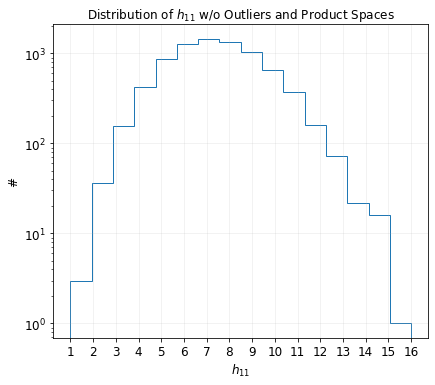

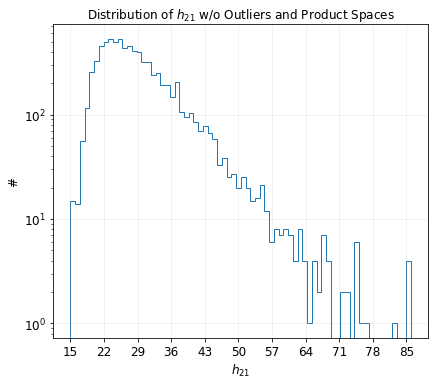

In [3]:
df_v2 = df.loc[df['isprod'] == 0] #------ remove product spaces
df_v2 = df_v2.loc[df['h11'] >= 1] #------ keep only 1 <= h11 <= 16
df_v2 = df_v2.loc[df['h11'] <= 16]
df_v2 = df_v2.loc[df['h21'] >= 1] #------ keep only 1 <= h21 <= 86
df_v2 = df_v2.loc[df['h21'] <= 86]

# extract the labels
h11 = df_v2['h11'] #----------------------------------------- extract h11 labels
h21 = df_v2['h21'] #----------------------------------------- extract h21 labels

bins_h11 = np.max(h11) - np.min(h11) + 1
bins_h21 = np.max(h21) - np.min(h21) + 1

# create plot for h11
fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout()

ax.grid(alpha=0.2)

ax.set_title('Distribution of $h_{11}$ w/o Outliers and Product Spaces')
ax.set_xlabel('$h_{11}$')
ax.set_ylabel('#')
ax.set_yscale('log')

ax.set_xticks(np.arange(np.min(h11), np.max(h11) + 1, step=int(bins_h11 / 10), dtype=np.int))

ax.hist(h11, bins=bins_h11, histtype='step')

fig.savefig(path.join(IMG_PATH, 'distribution_h11_noout_noprod.pdf'), dpi=96, format='pdf')
plt.show()
plt.close(fig)

# create plot for h21
fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout()

ax.grid(alpha=0.2)

ax.set_title('Distribution of $h_{21}$ w/o Outliers and Product Spaces')
ax.set_xlabel('$h_{21}$')
ax.set_ylabel('#')
ax.set_yscale('log')

ax.set_xticks(np.arange(np.min(h21), np.max(h21) + 1, step=int(bins_h21 / 10), dtype=np.int))

ax.hist(h21, bins=bins_h21, histtype='step')

fig.savefig(path.join(IMG_PATH, 'distribution_h21_noout_noprod.pdf'), dpi=96, format='pdf')
plt.show()
plt.close(fig)